In [45]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


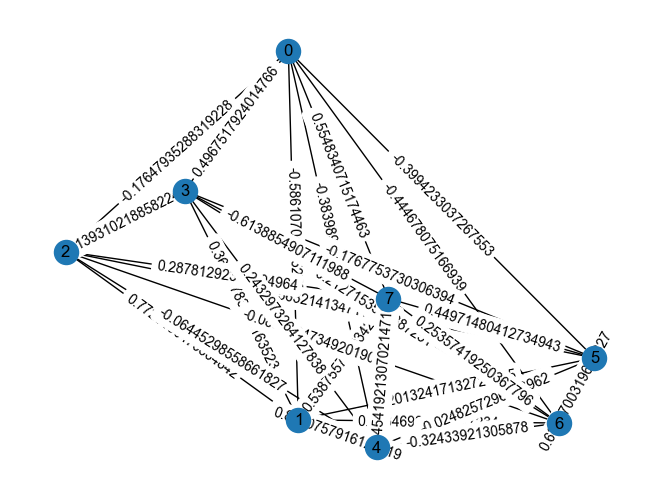

In [52]:
T = 15

# Load data from a JSONL file
market = Market.from_jsonl("./tick_data.jsonl")

# Get periods of length 15
periods = market.get_periods(period_length=15)

# Build the graph
state_graph = market.build_graph(periods, 0)

clustering = LouvainClustering().fit(periods, G=state_graph)

In [53]:
# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
print(f"Cluster labels: {clustering.labels}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 8
Number of clusters: 3
Cluster sizes: [2, 4, 2]
Cluster labels: [0 1 1 1 1 2 2 0]
Transition matrix: 
[[0.5  0.5  0.  ]
 [0.   0.75 0.25]
 [0.5  0.   0.5 ]]


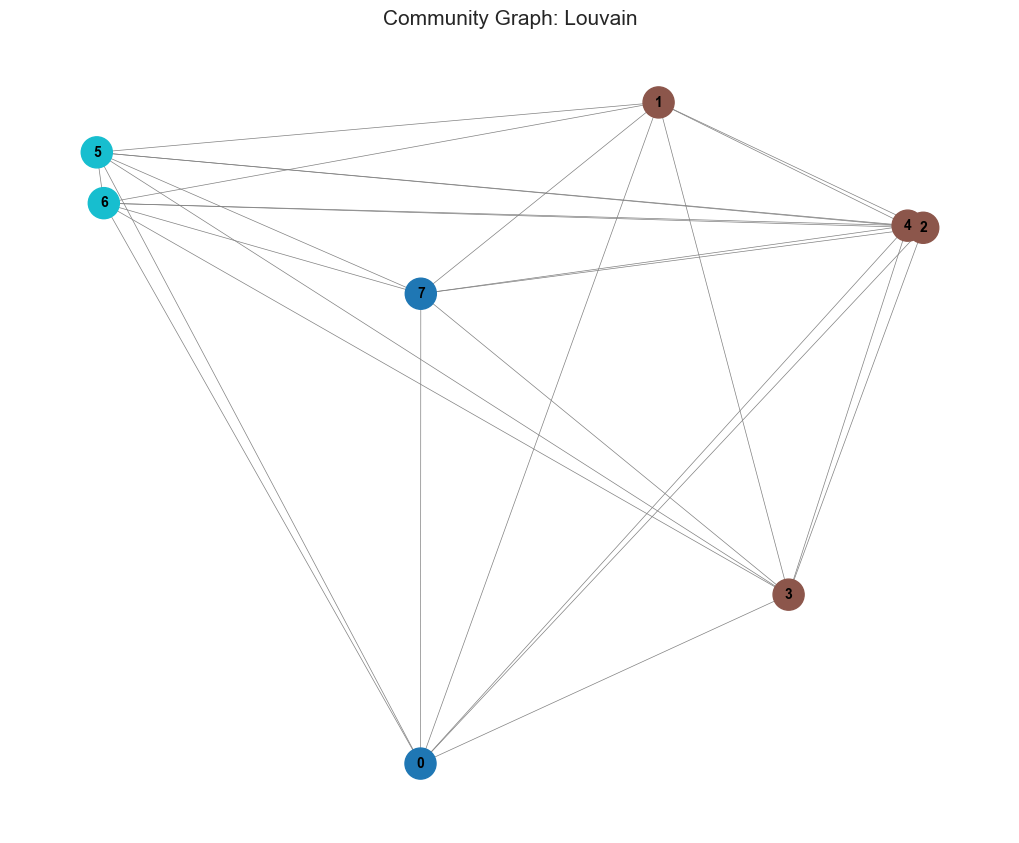

In [54]:
clustering.plot_community_graph(state_graph, method='Louvain')

In [55]:
print(periods)

[Period(start=1672561800, end=1672561815, tick_data=[Tick(timestamp=1672561800, stock='AAPL', bid_price=150.83, bid_volume=592, ask_price=151.21, ask_volume=1090, trade_price=151.13, trade_volume=757, spread=0.37999999999999545, quote_volume_imbalance=0.29607609988109396)]), Period(start=1672561815, end=1672561830, tick_data=[Tick(timestamp=1672565400, stock='AAPL', bid_price=150.96, bid_volume=824, ask_price=151.39, ask_volume=1186, trade_price=151.26, trade_volume=522, spread=0.4299999999999784, quote_volume_imbalance=0.18009950248756218)]), Period(start=1672561830, end=1672561845, tick_data=[Tick(timestamp=1672565400, stock='AAPL', bid_price=149.27, bid_volume=1072, ask_price=149.7, ask_volume=922, trade_price=149.53, trade_volume=897, spread=0.4299999999999784, quote_volume_imbalance=-0.07522567703109329)]), Period(start=1672561845, end=1672561860, tick_data=[Tick(timestamp=1672572600, stock='AAPL', bid_price=149.77, bid_volume=812, ask_price=150.21, ask_volume=634, trade_price=150

2023-01-01 09:30:00 9.5
2023-01-01 09:31:45 9.516666666666667
2023-01-01 09:30:15 9.5
2023-01-01 09:30:30 9.5
2023-01-01 09:30:45 9.5
2023-01-01 09:31:00 9.516666666666667
2023-01-01 09:31:15 9.516666666666667
2023-01-01 09:31:30 9.516666666666667


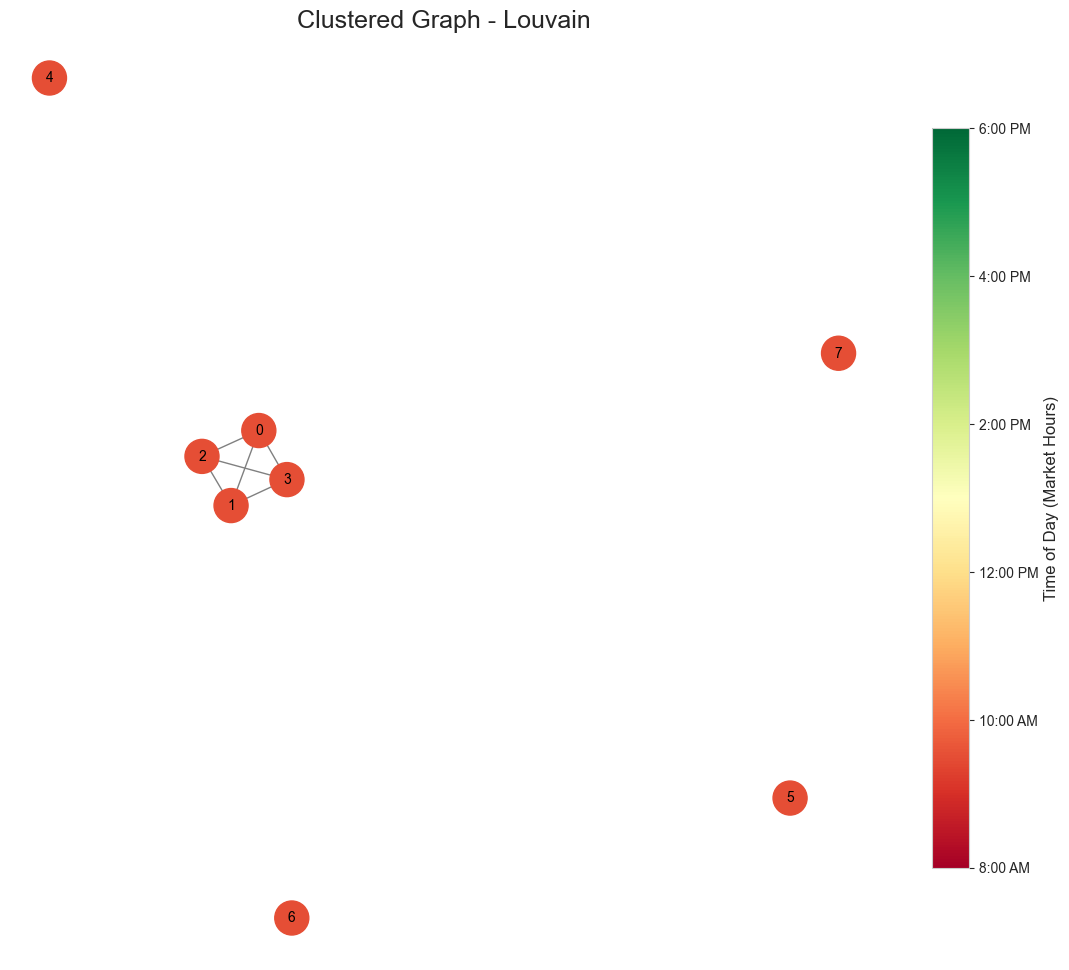

In [56]:
clustering.plot_cluster(state_graph, periods, method='Louvain')

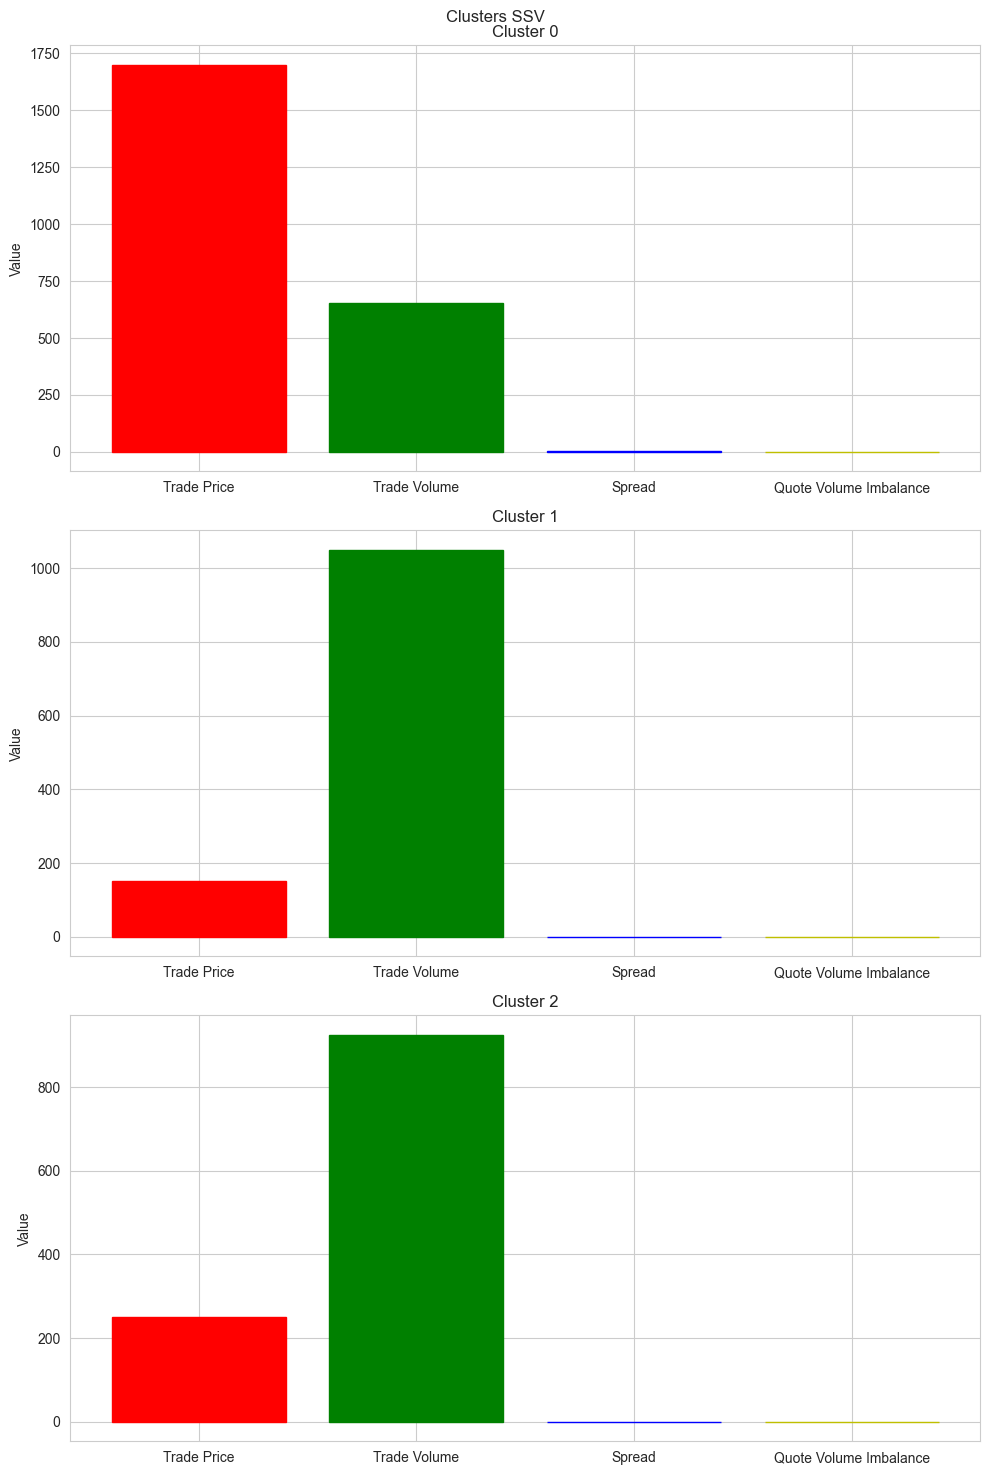

In [37]:
clustering.plot_ssv()

In [58]:
from datetime import datetime

dt = datetime.fromtimestamp(1672565400)
dt

datetime.datetime(2023, 1, 1, 10, 30)